<a href="https://colab.research.google.com/github/IamLucifer0312/Funiture-Recognition-CNN/blob/main/EDATest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import gdown

# Google Drive file ID (from the shared link)
file_id = "1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M"
file_name = "Furniture_Data.zip"
file_path = "/content/" + file_name

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)
print(f"Downloaded: {file_path}")


Downloading...
From (original): https://drive.google.com/uc?id=1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M
From (redirected): https://drive.google.com/uc?id=1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M&confirm=t&uuid=c42e406d-5fac-4b96-a6e3-4e2a20199f50
To: /content/Furniture_Data.zip
100%|██████████| 2.49G/2.49G [00:21<00:00, 117MB/s]

Downloaded: /content/Furniture_Data.zip


In [3]:
!unzip -q $file_path -d /content/extracted_folder


In [4]:
import os
import shutil

# Define paths
original_dataset_path = '/content/extracted_folder/Furniture_Data'  # Path to your original dataset
new_dataset_path = 'Task1_Data'          # Path to the new flattened dataset

# Create the new folder structure
categories = ['beds', 'chairs', 'dressers', 'lamps', 'sofas', 'tables']
for category in categories:
    os.makedirs(os.path.join(new_dataset_path, category), exist_ok=True)

# Copy images to the new structure
for category in categories:
    category_path = os.path.join(original_dataset_path, category)
    for style in os.listdir(category_path):
        style_path = os.path.join(category_path, style)
        if os.path.isdir(style_path):
          for image in os.listdir(style_path):
              src = os.path.join(style_path, image)
              dst = os.path.join(new_dataset_path, category, image)
              shutil.copy(src, dst)

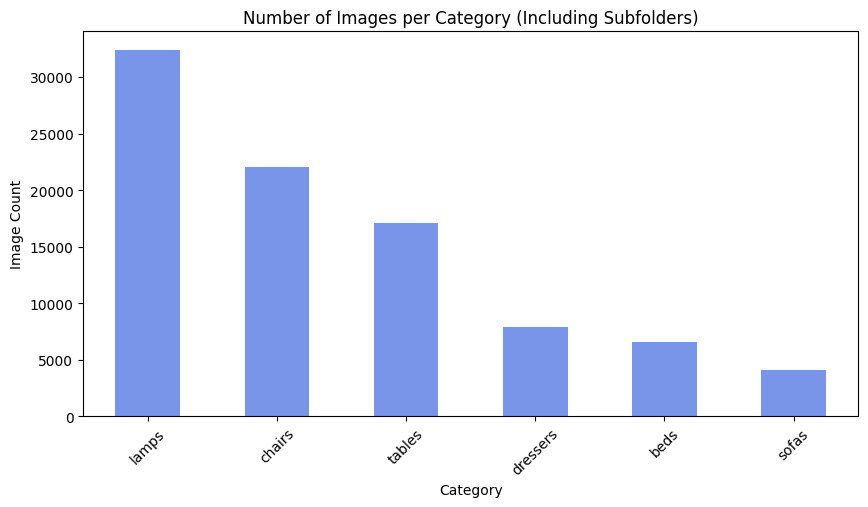

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = "/content/" + new_dataset_path

def count_images(category_path):
    """Counts all image files within a category, including subfolders."""
    count = 0
    for root, _, files in os.walk(category_path):
        count += sum(1 for file in files if file.lower().endswith(('.jpg', '.png', '.jpeg')))
    return count

# Count images for each category
category_counts = {category: count_images(os.path.join(dataset_path, category)) for category in categories}

# Convert to DataFrame
df = pd.DataFrame.from_dict(category_counts, orient="index", columns=["Image Count"])
df.sort_values("Image Count", ascending=False, inplace=True)

# Plot category distribution
plt.figure(figsize=(10, 5))
df["Image Count"].plot(kind="bar", color="royalblue", alpha=0.7)
plt.title("Number of Images per Category (Including Subfolders)")
plt.xlabel("Category")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.show()


In [6]:
import hashlib
from PIL import Image
import cv2
import random

# Function to compute image hash
def get_image_hash(image_path):
    """Generate an MD5 hash for an image file."""
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

# Store unique images and duplicates
hashes = {}
deleted_count = 0

# Traverse categories and subfolders
for category in categories:
    category_path = os.path.join(dataset_path, category)

    if os.path.exists(category_path):
      image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
      for img_name in image_files:
          img_path = os.path.join(category_path, img_name)
          img_hash = get_image_hash(img_path)

          if img_hash in hashes:
              os.remove(img_path)  # Delete duplicate image
              deleted_count += 1
              print(f"Deleted: {img_path}")
          else:
              hashes[img_hash] = img_path  # Store first occurrence


# Report results
print(f"\n✅ Removed {deleted_count} duplicate images.")

Deleted: /content/Task1_Data/beds/2797transitional-platform-beds.jpg
Deleted: /content/Task1_Data/beds/5715transitional-platform-beds.jpg
Deleted: /content/Task1_Data/beds/4481modern-platform-beds.jpg
Deleted: /content/Task1_Data/beds/8532mediterranean-canopy-beds.jpg
Deleted: /content/Task1_Data/beds/1447contemporary-platform-beds.jpg
Deleted: /content/Task1_Data/beds/7048traditional-panel-beds.jpg
Deleted: /content/Task1_Data/beds/9454transitional-platform-beds.jpg
Deleted: /content/Task1_Data/beds/6856traditional-kids-beds.jpg
Deleted: /content/Task1_Data/beds/6903traditional-panel-beds.jpg
Deleted: /content/Task1_Data/beds/4484modern-platform-beds.jpg
Deleted: /content/Task1_Data/beds/9393transitional-platform-beds.jpg
Deleted: /content/Task1_Data/beds/3455transitional-platform-beds.jpg
Deleted: /content/Task1_Data/beds/10013transitional-panel-beds.jpg
Deleted: /content/Task1_Data/beds/9187scandinavian-platform-beds.jpg
Deleted: /content/Task1_Data/beds/8370farmhouse-panel-beds.jpg

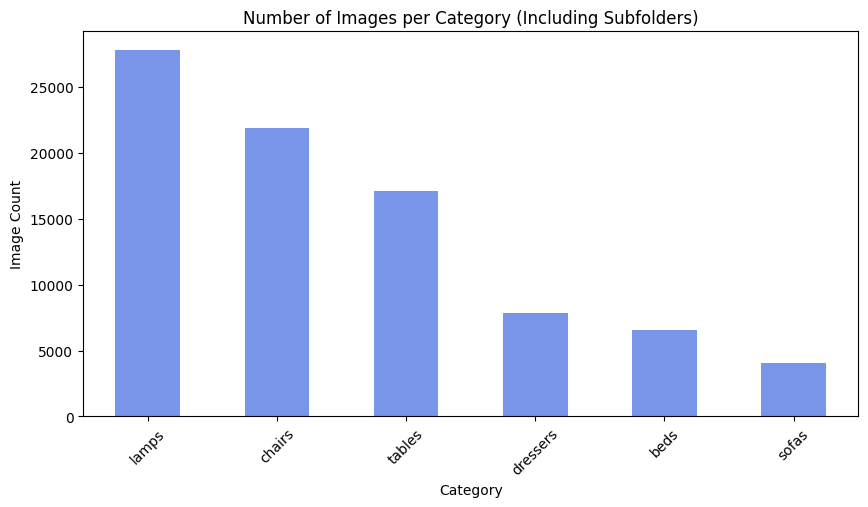

In [7]:
def count_images(category_path):
    """Counts all image files within a category, including subfolders."""
    count = 0
    for root, _, files in os.walk(category_path):
        count += sum(1 for file in files if file.lower().endswith(('.jpg', '.png', '.jpeg')))
    return count

# Count images for each category
category_counts = {category: count_images(os.path.join(dataset_path, category)) for category in categories}

# Convert to DataFrame
df = pd.DataFrame.from_dict(category_counts, orient="index", columns=["Image Count"])
df.sort_values("Image Count", ascending=False, inplace=True)

# Plot category distribution
plt.figure(figsize=(10, 5))
df["Image Count"].plot(kind="bar", color="royalblue", alpha=0.7)
plt.title("Number of Images per Category (Including Subfolders)")
plt.xlabel("Category")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Create the split folder structure
split_path = 'Task1_Data_Split'
for split in ['train', 'val', 'test']:
    for category in categories:
        os.makedirs(os.path.join(split_path, split, category), exist_ok=True)

# Split and copy images
for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)

    # Split into train (70%), val (15%), and test (15%)
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Copy images to the respective folders
    for image in train_images:
        src = os.path.join(category_path, image)
        dst = os.path.join(split_path, 'train', category, image)
        shutil.copy(src, dst)

    for image in val_images:
        src = os.path.join(category_path, image)
        dst = os.path.join(split_path, 'val', category, image)
        shutil.copy(src, dst)

    for image in test_images:
        src = os.path.join(category_path, image)
        dst = os.path.join(split_path, 'test', category, image)
        shutil.copy(src, dst)

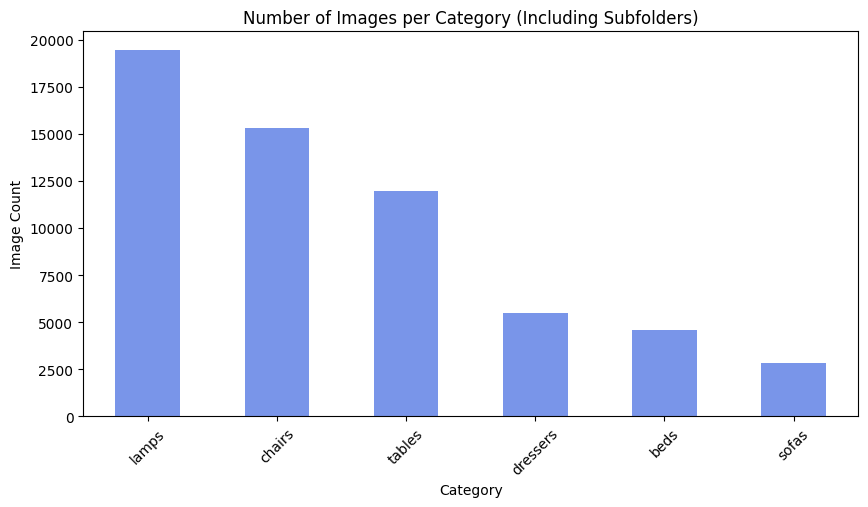

In [9]:
train_data_path = "/content/" + split_path + "/train"

def count_images(category_path):
    """Counts all image files within a category, including subfolders."""
    count = 0
    for root, _, files in os.walk(category_path):
        count += sum(1 for file in files if file.lower().endswith(('.jpg', '.png', '.jpeg')))
    return count

# Count images for each category
category_counts = {category: count_images(os.path.join(train_data_path, category)) for category in categories}

# Convert to DataFrame
df = pd.DataFrame.from_dict(category_counts, orient="index", columns=["Image Count"])
df.sort_values("Image Count", ascending=False, inplace=True)

# Plot category distribution
plt.figure(figsize=(10, 5))
df["Image Count"].plot(kind="bar", color="royalblue", alpha=0.7)
plt.title("Number of Images per Category (Including Subfolders)")
plt.xlabel("Category")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.show()

In [10]:
from sklearn.utils import resample
import numpy as np

# Example: Oversample minority classes
df = pd.DataFrame.from_dict(category_counts, orient="index", columns=["Image Count"])
df = df.sort_values("Image Count", ascending=True)
minority_classes = df[:3].index.to_numpy()  # Convert index to NumPy array
print(minority_classes)

['sofas' 'beds' 'dressers']


In [11]:
import math

# Step 1: Count images in each class
class_counts = {}
for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Step 2: Find the majority class count
mean_samples = math.ceil(sum(class_counts.values()) / len(class_counts))
print(f"Majority class has {mean_samples} samples")

# Step 3: Oversample minority classes
for class_name in minority_classes:
    class_path = os.path.join(train_data_path, class_name)
    images = os.listdir(class_path)

    if len(images) < mean_samples:
        # Compute how many images we need to add
        num_samples_needed = mean_samples - len(images)

        # Resample with replacement to get the needed images
        new_images = resample(images, replace=True, n_samples=num_samples_needed, random_state=42)

        # Duplicate the images
        for i, img in enumerate(new_images):
            src_path = os.path.join(class_path, img)
            dst_path = os.path.join(class_path, f"aug_{i}_{img}")  # Rename duplicate to avoid conflicts
            shutil.copy(src_path, dst_path)

        print(f"Oversampled {class_name}: Added {num_samples_needed} images")


Majority class has 9936 samples
Oversampled sofas: Added 7088 images
Oversampled beds: Added 5369 images
Oversampled dressers: Added 4463 images


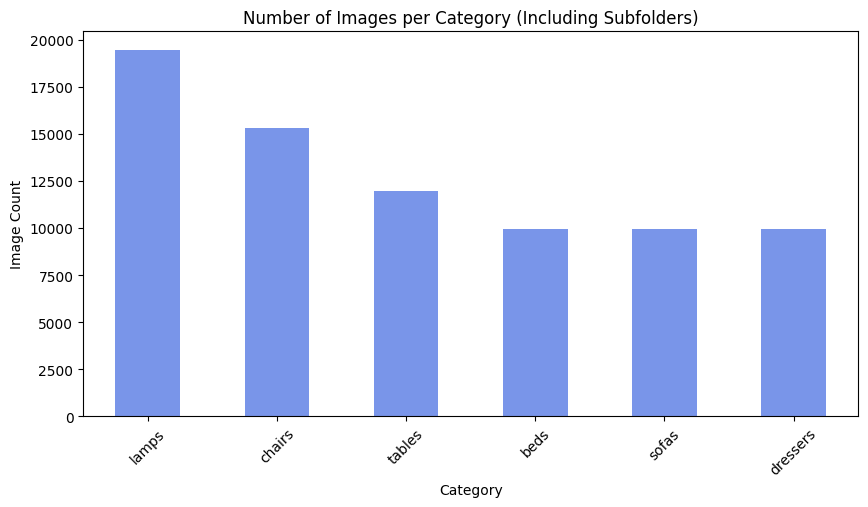

In [12]:
train_data_path = "/content/" + split_path + "/train"

def count_images(category_path):
    """Counts all image files within a category, including subfolders."""
    count = 0
    for root, _, files in os.walk(category_path):
        count += sum(1 for file in files if file.lower().endswith(('.jpg', '.png', '.jpeg')))
    return count

# Count images for each category
category_counts = {category: count_images(os.path.join(train_data_path, category)) for category in categories}

# Convert to DataFrame
df = pd.DataFrame.from_dict(category_counts, orient="index", columns=["Image Count"])
df.sort_values("Image Count", ascending=False, inplace=True)

# Plot category distribution
plt.figure(figsize=(10, 5))
df["Image Count"].plot(kind="bar", color="royalblue", alpha=0.7)
plt.title("Number of Images per Category (Including Subfolders)")
plt.xlabel("Category")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.show()

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=15,  # Rotate images by ±15 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1,  # Shift images vertically by up to 10%
    shear_range=0.1,  # Shear images by up to 10%
    zoom_range=0.1,  # Zoom in/out by up to 10%
    horizontal_flip=True,  # Flip images horizontally
    brightness_range=[0.8, 1.2],  # Adjust brightness
    fill_mode='nearest'  # Fill missing pixels after transformations
)

# Load dataset with augmentation
train_generator = train_datagen.flow_from_directory(
    directory='Task1_Data_Split/train',
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'  # Use 'binary' for binary classification
)

# For validation and test sets, use only rescaling (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

val_generator = val_test_datagen.flow_from_directory(
    directory='Task1_Data_Split/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    directory='Task1_Data_Split/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 76526 images belonging to 6 classes.
Found 12775 images belonging to 6 classes.
Found 12776 images belonging to 6 classes.


In [14]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.9 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model-building function
def build_model(hp):
    model = Sequential()

    # Convolutional layers with tunable filter size
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3,3), activation='relu', padding='same', input_shape=(224, 224, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=64),
        kernel_size=(3,3), activation='relu', padding='same'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv3_filters', min_value=128, max_value=512, step=128),
        kernel_size=(3,3), activation='relu', padding='same'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully connected layers with tunable units
    model.add(Dense(
        units=hp.Int('dense1_units', min_value=128, max_value=1024, step=128),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(6, activation='softmax'))  # 6 classes (furniture categories)

    # Compile the model with tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Define the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=2,  # Number of different hyperparameter sets to try
    executions_per_trial=1,  # Number of times to train each model
    directory='kt_random_search',  # Directory to save search results
    project_name='furniture_classification'  # Name for this tuning project
)

# Display the search space
tuner.search_space_summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Search space summary
Default search space size: 6
conv1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
conv2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
conv3_filters (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
dense1_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 128, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0005, 0.0001], 'ordered': True}


In [ ]:
print(train_generator.class_indices)


{'beds': 0, 'chairs': 1, 'dressers': 2, 'lamps': 3, 'sofas': 4, 'tables': 5}


In [ ]:
# Run the hyperparameter search
tuner.search(
    train_generator,  # Training dataset
    validation_data=val_generator,  # Validation dataset
    epochs=10,
    callbacks=[]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparam eters: {best_hps.values}")



Trial 2 Complete [02h 36m 15s]
val_accuracy: 0.9509197473526001

Best val_accuracy So Far: 0.9509197473526001
Total elapsed time: 05h 12m 10s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
64                |128               |conv1_filters
192               |128               |conv2_filters
512               |128               |conv3_filters
256               |1024              |dense1_units
0.2               |0.4               |dropout_rate
0.0005            |0.0005            |learning_rate

Epoch 1/10
 285/2392 ━━━━━━━━━━━━━━━━━━━━ 13:45 392ms/step - accuracy: 0.4376 - loss: 1.8351

KeyboardInterrupt: 

In [ ]:
from keras_tuner import HyperParameters

# Manually define the best hyperparameters
best_hps = HyperParameters()
best_hps.Fixed('conv1_filters', 32)
best_hps.Fixed('conv2_filters', 256)
best_hps.Fixed('conv3_filters', 512)
best_hps.Fixed('dense1_units', 256)
best_hps.Fixed('dropout_rate', 0.4)
best_hps.Fixed('learning_rate', 0.0001)


0.0001

In [ ]:
# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(train_generator, validation_data=val_generator, epochs=15)

# Save the best model
best_model.save("best_furniture_model.h5")

Epoch 1/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 936s 390ms/step - accuracy: 0.6371 - loss: 0.9981 - val_accuracy: 0.8714 - val_loss: 0.3796
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 926s 387ms/step - accuracy: 0.8251 - loss: 0.5321 - val_accuracy: 0.8968 - val_loss: 0.3067
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 929s 389ms/step - accuracy: 0.8532 - loss: 0.4447 - val_accuracy: 0.9145 - val_loss: 0.2619
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 933s 390ms/step - accuracy: 0.8772 - loss: 0.3729 - val_accuracy: 0.9267 - val_loss: 0.2218
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 930s 389ms/step - accuracy: 0.8844 - loss: 0.3510 - val_accuracy: 0.9281 - val_loss: 0.2243
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 928s 388ms/step - accuracy: 0.8971 - loss: 0.3139 - val_accuracy: 0.9353 - val_loss: 0.1978
Epoch 7/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 940s 393ms/step - accuracy: 0.9016 - loss: 0.3003 - val_accuracy: 0.9335 - val_loss: 0.1976
Epoch 8/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 930s 389ms/step - ac

In [ ]:
best_model.save("task1.keras")

In [ ]:
best_model.evaluate(test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9525 - loss: 0.1524


[0.15776066482067108, 0.9496712684631348]

In [53]:
import numpy as np
import tensorflow as tf

def preprocess_image(image_path):
    # Load image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode as RGB

    # Resize to (224, 224)
    image = tf.image.resize(image, (224, 224))

    # Normalize to [0, 1] range
    image = image / 255.0

    # Add batch dimension
    image = np.expand_dims(image, axis=0)  # Shape becomes (1, 224, 224, 3)

    return image


False


In [54]:
import keras
best_model = keras.saving.load_model("/best_furniture_model.h5")

# Load and preprocess the image
image_path = "/Screenshot 2025-02-24 052917.png"  # Change to your image path
image = preprocess_image(image_path)

# Predict
predictions = best_model.predict(image)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)[0]

# Print results
print(f"Predicted Class: {predicted_class}")

# Get the class indices from the train generator
class_indices = train_generator.class_indices

# Reverse the dictionary to map index → class label
class_labels = {v: k for k, v in class_indices.items()}

print(f"Predicted Category: {class_labels[predicted_class]}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Predicted Class: 2
Predicted Category: dressers


1863


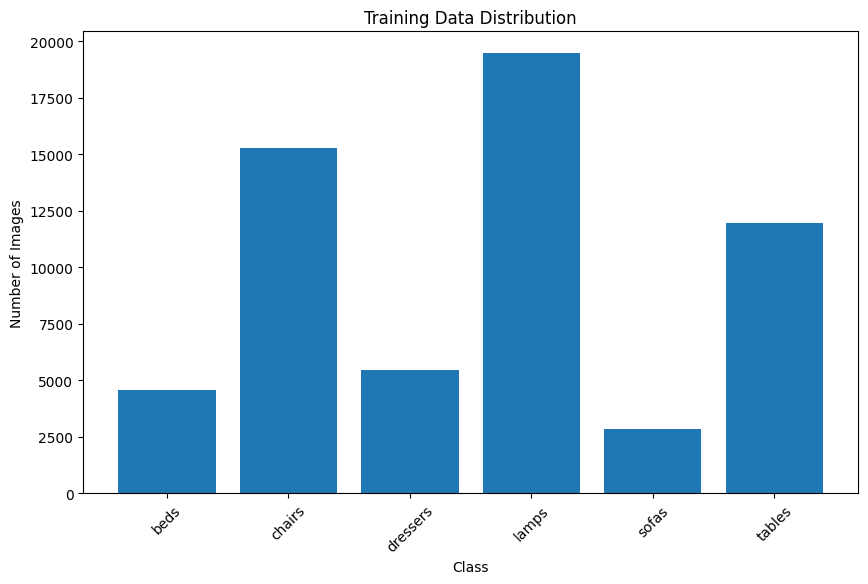